### Arbol de Decision Regresion 

In [2]:
# Librerias
import pandas as pd
import numpy as np
# Almacenamiento 
import joblib
# Entrenamiento y prueba
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

#Escalar Variables
from sklearn.preprocessing import MinMaxScaler

#Evaluación del modelo
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

#Creación de modelo
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree


# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


### DataSet

In [4]:
url='https://raw.githubusercontent.com/kennethLeonel/Monografia-calidad-del-aire-valle-de-aburra/refs/heads/main/data/stage/dataSetLimpio4.csv'

In [5]:
df=pd.read_csv(url)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19447 entries, 0 to 19446
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   anio                        19447 non-null  int64
 1   mes                         19447 non-null  int64
 2   dia                         19447 non-null  int64
 3   hora                        19447 non-null  int64
 4   pm25                        19447 non-null  int64
 5   festivo                     19447 non-null  int64
 6   temperatura                 19447 non-null  int64
 7   humedad                     19447 non-null  int64
 8   presion                     19447 non-null  int64
 9   p1                          19447 non-null  int64
 10  velocidad_prom              19447 non-null  int64
 11  velocidad_max               19447 non-null  int64
 12  direccion_prom              19447 non-null  int64
 13  direccion_max               19447 non-null  int64
 14  dia_se

In [7]:
# Variables de Entrada
variablesNumericas=df.select_dtypes(include=['int64']).columns.tolist()
df[variablesNumericas].head(5)

,anio,mes,dia,hora,pm25,festivo,temperatura,humedad,presion,p1,...,dia_semana_Inicio Semana,dia_semana_Media semana,estacion_Estacion Aranjuez,estacion_Estacion Belen,estacion_Estacion Caldas,estacion_Estacion Itagui,franja_horaria_Madrugada,franja_horaria_Mañana,franja_horaria_Noche,franja_horaria_Tarde
0,2024,1,1,0,16,1,20,84,0,0,...,1,0,0,0,0,1,1,0,0,0
1,2024,1,1,2,47,1,18,82,0,0,...,1,0,0,0,0,1,1,0,0,0
2,2024,1,1,6,39,1,17,84,0,0,...,1,0,0,0,0,1,0,1,0,0
3,2024,1,1,8,29,1,21,74,0,0,...,1,0,0,0,0,1,0,1,0,0
4,2024,1,1,9,38,1,22,71,0,0,...,1,0,0,0,0,1,0,1,0,0


### Modelo

In [9]:
# Se establecen la variable de entrada 'X' 
# la variable de de salida 'y' eliminando la variable PM25 y anio
X=df.drop(columns=['pm25'])
y = df['pm25']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1), 
                                        train_size   = 0.7,
                                        random_state = 12345,
                                        shuffle      = True
                                    )
X_train.head()

,anio,mes,dia,hora,festivo,temperatura,humedad,presion,p1,velocidad_prom,...,dia_semana_Inicio Semana,dia_semana_Media semana,estacion_Estacion Aranjuez,estacion_Estacion Belen,estacion_Estacion Caldas,estacion_Estacion Itagui,franja_horaria_Madrugada,franja_horaria_Mañana,franja_horaria_Noche,franja_horaria_Tarde
14029,2024,7,9,10,0,25,50,852,0,1,...,1,0,1,0,0,0,0,1,0,0
1186,2024,2,27,1,0,19,86,0,0,1,...,1,0,0,0,0,1,1,0,0,0
7702,2024,6,20,13,0,22,65,825,0,1,...,0,1,0,0,1,0,0,0,0,1
2135,2024,5,27,6,0,20,87,0,0,0,...,1,0,0,0,0,1,0,1,0,0
18366,2024,7,20,22,1,23,71,849,0,1,...,0,0,0,1,0,0,0,0,1,0


In [11]:
# Se determinan las variables numéricas a Escalar
columnasModelo = X.columns.tolist()
columnasModelo 

['anio',
 'mes',
 'dia',
 'hora',
 'festivo',
 'temperatura',
 'humedad',
 'presion',
 'p1',
 'velocidad_prom',
 'velocidad_max',
 'direccion_prom',
 'direccion_max',
 'dia_semana_Fin de Semana',
 'dia_semana_Inicio Semana',
 'dia_semana_Media semana',
 'estacion_Estacion Aranjuez',
 'estacion_Estacion Belen',
 'estacion_Estacion Caldas',
 'estacion_Estacion Itagui',
 'franja_horaria_Madrugada',
 'franja_horaria_Mañana',
 'franja_horaria_Noche',
 'franja_horaria_Tarde']

In [12]:
# Se crea un objeto MinMaxScaler
scaler = MinMaxScaler()

# Se escalan los valores del dataset entrenamiento y prueba de las columnas numéricas
X_train[columnasModelo] = scaler.fit_transform(X_train[columnasModelo])
X_test[columnasModelo] = scaler.transform(X_test[columnasModelo])

X_train[columnasModelo].head(3)

,anio,mes,dia,hora,festivo,temperatura,humedad,presion,p1,velocidad_prom,...,dia_semana_Inicio Semana,dia_semana_Media semana,estacion_Estacion Aranjuez,estacion_Estacion Belen,estacion_Estacion Caldas,estacion_Estacion Itagui,franja_horaria_Madrugada,franja_horaria_Mañana,franja_horaria_Noche,franja_horaria_Tarde
14029,0.0,0.750,0.266667,0.434783,0.0,0.590909,0.430233,0.995327,0.0,0.2,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1186,0.0,0.125,0.866667,0.043478,0.0,0.318182,0.848837,0.000000,0.0,0.2,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
7702,0.0,0.625,0.633333,0.565217,0.0,0.454545,0.604651,0.963785,0.0,0.2,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [13]:
#Creacion del Modelo de Arbole de Regresion
modelo=DecisionTreeRegressor(
         max_depth=3,
         random_state=123
)
#Entrenamiento del Modelo
modelo.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, random_state=123)

In [14]:
#imprimos los valores del R2
print('Training',modelo.score(X_train,y_train))
print('Test    :',r2_score(y_test,modelo.predict(X_test)))

Training 0.29324600909551024
Test    : 0.284468987942032


Profundidad del árbol:3
Número de nodos:8


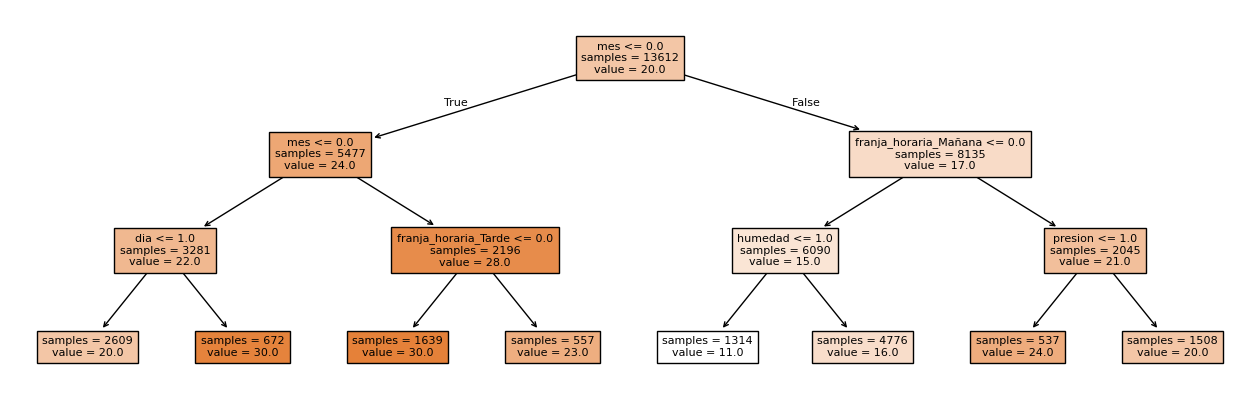

In [15]:
# Visualizamos la estructura del arbol

fig,ax=plt.subplots(figsize=(16,5))
plot = plot_tree(
            decision_tree = modelo,
            feature_names = df.drop(columns = "pm25").columns,
            filled        = True,
            impurity      = False,
            fontsize      = 8,
            precision     = 0,
            ax            = ax
       )
print(f'Profundidad del árbol:{modelo.get_depth()}')
print(f'Número de nodos:{modelo.get_n_leaves()}')

### Afinando el  modelo

In [17]:
X=df.drop(columns=['pm25'])
y=df['pm25']

# Se asignan los datos de X_completo  y y_completo
X_completo=X
y_completo=y

In [18]:
# Escalamos Variables
X_completo[columnasModelo]=scaler.fit_transform(X_completo[columnasModelo])
X_completo[columnasModelo].head()

,anio,mes,dia,hora,festivo,temperatura,humedad,presion,p1,velocidad_prom,...,dia_semana_Inicio Semana,dia_semana_Media semana,estacion_Estacion Aranjuez,estacion_Estacion Belen,estacion_Estacion Caldas,estacion_Estacion Itagui,franja_horaria_Madrugada,franja_horaria_Mañana,franja_horaria_Noche,franja_horaria_Tarde
0,0.0,0.0,0.0,0.000000,1.0,0.363636,0.825581,0.0,0.0,0.166667,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.086957,1.0,0.272727,0.802326,0.0,0.0,0.333333,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.260870,1.0,0.227273,0.825581,0.0,0.0,0.000000,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.347826,1.0,0.409091,0.709302,0.0,0.0,0.000000,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.391304,1.0,0.454545,0.674419,0.0,0.0,0.000000,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


### Identificación de los mejores hiperparametros

In [20]:
# Se procede a entrenar el modelo con varios multiparametros para buscar el mejor

modeloTree=DecisionTreeRegressor()
CV=10

# Se establecen los hiperparametros
parametros={'max_depth': [2, 4, 6, 8,10,15,20],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [2, 5, 10, 15, 20],
    'max_features': [None, 'sqrt', 'log2']
           }

#Definimos un GridSearchCV con validacion cruzada

validacion=GridSearchCV(
    modeloTree,
    param_grid=parametros,
    cv=CV,
    verbose=3)
# Se entrena el GridSearchSV
validacion.fit(X_completo,y_completo)

Fitting 10 folds for each of 420 candidates, totalling 4200 fits
[CV 1/10] END max_depth=2, max_features=None, min_samples_leaf=2, min_samples_split=2;, score=0.088 total time=   0.0s
[CV 2/10] END max_depth=2, max_features=None, min_samples_leaf=2, min_samples_split=2;, score=0.073 total time=   0.0s
[CV 3/10] END max_depth=2, max_features=None, min_samples_leaf=2, min_samples_split=2;, score=-0.077 total time=   0.0s
[CV 4/10] END max_depth=2, max_features=None, min_samples_leaf=2, min_samples_split=2;, score=0.313 total time=   0.0s
[CV 5/10] END max_depth=2, max_features=None, min_samples_leaf=2, min_samples_split=2;, score=0.116 total time=   0.0s
[CV 6/10] END max_depth=2, max_features=None, min_samples_leaf=2, min_samples_split=2;, score=0.088 total time=   0.0s
[CV 7/10] END max_depth=2, max_features=None, min_samples_leaf=2, min_samples_split=2;, score=0.171 total time=   0.0s
[CV 8/10] END max_depth=2, max_features=None, min_samples_leaf=2, min_samples_split=2;, score=0.056 t

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 15, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 5, 10, 15, 20],
                         'min_samples_split': [2, 5, 10, 15]},
             verbose=3)

### Visualizacion de Resultados

In [22]:
resultados=pd.DataFrame(validacion.cv_results_)
resultados.filter(regex='(param*|mean_t|std_t)')\
    .drop(columns='params') \
    .sort_values('mean_test_score',ascending=False) \
    .head(4)

,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,mean_test_score,std_test_score
125,6,None,5,5,0.273954,0.162225
130,6,None,10,10,0.273893,0.161405
121,6,None,2,5,0.273844,0.162236
126,6,None,5,10,0.273798,0.162084


In [23]:


# Obtener los resultados del grid search
results_grid_TreeR = pd.DataFrame(validacion.cv_results_)

# Seleccionar las columnas deseadas
columns_grid_TreeR = ['param_max_depth']  + \
                    ['param_min_samples_split']  + \
                    ['param_min_samples_leaf']  + \
                    ['param_max_features']   + \
                    ['mean_test_score', 'std_test_score']  + \
                    [f'split{i}_test_score' for i in range(CV)]

# Filtrar y crear una copia explícita de los resultados
results_grid_TreeR_filtered = results_grid_TreeR[columns_grid_TreeR].copy()

# Crear la columna scoreWithStd: f1 / std usando .loc para evitar el warning
results_grid_TreeR_filtered.loc[:, 'scoreWithStd'] = results_grid_TreeR_filtered.apply(
    lambda row: row['mean_test_score'] / row['std_test_score'] if row['std_test_score'] != 0 else 0,
    axis=1
)

# Encuentra el índice del máximo valor en la columna scoreWithStd
indice_max_scoreWithStd = results_grid_TreeR_filtered['scoreWithStd'].idxmax()

# Mostrar los scores promedios por cada parámetro
results_grid_TreeR_filtered[['param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf','param_max_features','mean_test_score', 'std_test_score', 'scoreWithStd']]

,param_max_depth,param_min_samples_split,param_min_samples_leaf,param_max_features,mean_test_score,std_test_score,scoreWithStd
0,2,2,2,None,0.105538,0.097151,1.086332
1,2,5,2,None,0.105538,0.097151,1.086332
2,2,10,2,None,0.105538,0.097151,1.086332
3,2,15,2,None,0.105538,0.097151,1.086332
4,2,2,5,None,0.105538,0.097151,1.086332
...,...,...,...,...,...,...,...
415,20,15,15,log2,0.031479,0.160709,0.195877
416,20,2,20,log2,0.061508,0.152026,0.404590
417,20,5,20,log2,-0.007644,0.296170,-0.025809
418,20,10,20,log2,0.001435,0.208203,0.006891


In [24]:
# Se identifican los mejores hiperparametros
mejoresParametros=validacion.best_params_
print('Mejores Hiperparametros: ',mejoresParametros)

Mejores Hiperparametros:  {'max_depth': 6, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 5}


In [25]:
#Observamos los 5 Mejores

results_grid_TreeR_filtered.sort_values(by='scoreWithStd', ascending=False).head(5)[
    ['param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf','param_max_features','mean_test_score', 'std_test_score', 'scoreWithStd']]

,param_max_depth,param_min_samples_split,param_min_samples_leaf,param_max_features,mean_test_score,std_test_score,scoreWithStd
71,4,15,10,None,0.221933,0.12155,1.825856
60,4,2,2,None,0.221933,0.12155,1.825856
70,4,10,10,None,0.221933,0.12155,1.825856
69,4,5,10,None,0.221933,0.12155,1.825856
68,4,2,10,None,0.221933,0.12155,1.825856


In [26]:
 # Seleccionamos el indice maximo

registro_max_scoreWithStd = results_grid_TreeR_filtered.loc[indice_max_scoreWithStd]

registro_max_scoreWithStd.transpose()

param_max_depth                   4
param_min_samples_split           2
param_min_samples_leaf            2
param_max_features             None
mean_test_score            0.221933
std_test_score              0.12155
split0_test_score          0.243014
split1_test_score          0.060625
split2_test_score            0.0512
split3_test_score          0.461324
split4_test_score          0.141372
split5_test_score          0.312538
split6_test_score          0.277991
split7_test_score          0.222855
split8_test_score          0.316314
split9_test_score          0.132094
scoreWithStd               1.825856
Name: 60, dtype: object

In [27]:
results_grid_TreeR_filtered.loc[indice_max_scoreWithStd]['mean_test_score']

0.22193264218127579

###  Modelo Final

In [29]:
modeloTreeR = DecisionTreeRegressor( max_depth = mejoresParametros["max_depth"]
                               , min_samples_split = mejoresParametros["min_samples_split"]
                               , min_samples_leaf = mejoresParametros["min_samples_leaf"]
                               , max_features = mejoresParametros["max_features"]
                               , random_state = 1234)


#Se entrena el modelo con los datos completos
modeloTreeR.fit(X_completo, y_completo)

DecisionTreeRegressor(max_depth=6, min_samples_leaf=5, min_samples_split=5,
                      random_state=1234)

In [30]:
print(f'El resultado del modelo con los mejores hiperparametros es  de:{modeloTreeR.score(X_completo,y_completo)}')

El resultado del modelo con los mejores hiperparametros es  de:0.4349502870772104


### CCP_ALPHA

In [32]:
#Se crea una instancia de una DecisionTreeRegressor 
modeloTreeR_ccp = DecisionTreeRegressor( random_state = 123)

parametros = {'ccp_alpha': np.logspace(-6, 2, 9)}
metricas = 'R2'

CV = 10
grid_TreeR = GridSearchCV(
                          modeloTreeR_ccp, 
                          param_grid=parametros, 
                          cv=CV, 
                          #return_train_score = True,
                          verbose=3)
grid_TreeR.fit(X_completo,y_completo) 

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV 1/10] END ..................ccp_alpha=1e-06;, score=0.256 total time=   0.2s
[CV 2/10] END .................ccp_alpha=1e-06;, score=-1.158 total time=   0.2s
[CV 3/10] END .................ccp_alpha=1e-06;, score=-0.245 total time=   0.3s
[CV 4/10] END ..................ccp_alpha=1e-06;, score=0.257 total time=   0.2s
[CV 5/10] END .................ccp_alpha=1e-06;, score=-0.738 total time=   0.2s
[CV 6/10] END ..................ccp_alpha=1e-06;, score=0.045 total time=   0.2s
[CV 7/10] END .................ccp_alpha=1e-06;, score=-0.418 total time=   0.2s
[CV 8/10] END .................ccp_alpha=1e-06;, score=-0.879 total time=   0.2s
[CV 9/10] END ..................ccp_alpha=1e-06;, score=0.106 total time=   0.2s
[CV 10/10] END ................ccp_alpha=1e-06;, score=-0.446 total time=   0.1s
[CV 1/10] END ..................ccp_alpha=1e-05;, score=0.256 total time=   0.1s
[CV 2/10] END .................ccp_alpha=1e-05;,

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=123),
             param_grid={'ccp_alpha': array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02])},
             verbose=3)

In [34]:
# Resultados

resultados = pd.DataFrame(grid_TreeR.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(10)

,param_ccp_alpha,mean_test_score,std_test_score
5,0.100000,0.256304,0.175081
6,1.000000,0.192714,0.110039
7,10.000000,0.036094,0.125381
4,0.010000,-0.029165,0.346795
8,100.000000,-0.137977,0.156344
3,0.001000,-0.305865,0.471578
0,0.000001,-0.322016,0.468987
1,0.000010,-0.322016,0.468987
2,0.000100,-0.322690,0.470179


In [35]:
print(f'El mejor ccp_alpha es:{grid_TreeR.best_params_}')

El mejor ccp_alpha es:{'ccp_alpha': 0.1}


In [36]:
#Datos del Arbol Final

modelTreeR_ccp = grid_TreeR.best_estimator_
print(f"Profundidad del árbol: {modeloTreeR.get_depth()}")
print(f"Número de nodos terminales: {modeloTreeR.get_n_leaves()}")
print(f"Score: {grid_TreeR.best_score_}")

Profundidad del árbol: 6
Número de nodos terminales: 63
Score: 0.25630355867426036


In [37]:
# Modelo Final 


modelTreeR_ccp = DecisionTreeRegressor(
            ccp_alpha         = grid_TreeR.best_params_["ccp_alpha"],
            random_state      = 123
          )
modelTreeR_ccp.fit(X_completo, y_completo)

DecisionTreeRegressor(ccp_alpha=0.1, random_state=123)

In [38]:
joblib.dump(modeloTreeR, './modelos/ModeloArbol_PM25_CV.pkl')
joblib.dump(modelTreeR_ccp, './modelos/ModeloArbolccp_PM25_CV_ccp.pkl')

['./modelos/ModeloArbolccp_PM25_CV_ccp.pkl']